In [1]:
import pandas as pd
import numpy as np 
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import imghdr
import os
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns

C:\Users\gillp\AppData\Local\Temp\ipykernel_10016\1888475942.py:7: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:

# Set the path to the folder containing the images
path_to_folder = 'D:\\Project\\TrafficSign\\image data'

# Create an empty list to store the images
X = []
y = []
pred_class = []
count = 0


for foldername in os.listdir(path_to_folder):
      
        path_to_sub_folder = 'D:\\Project\\TrafficSign\\image data\\'+str(foldername)
# Loop over all the files in the folder
        
        
        
        for filename in os.listdir(path_to_sub_folder):
            # Check if the file is an image        
  
            if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
                # Load the image using OpenCV
                try:

                        img = cv2.imread(os.path.join(path_to_sub_folder, filename),cv2.IMREAD_GRAYSCALE)
                        resized_img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
                        normalized_img = resized_img / 255.0

                        # Add the image to the list
                        X.append(normalized_img)
                        y.append(count)
                        


                except:       

                        image_path = str(path_to_sub_folder)+str(filename)

                        if os.path.exists(image_path):
                                os.remove(image_path)
                                print(f"Deleted {image_path}")
                        else:
                                print(f"{image_path} does not exist")
                                
                                
        pred_class.append(foldername)         
        count = count + 1

D:\Project\TrafficSign\image data\do not enter(1)Capture-décran-2023-02-09-à-09.26.05.png does not exist
D:\Project\TrafficSign\image data\do not enter(1)p616-no-entry.jpg does not exist
D:\Project\TrafficSign\image data\Pedestrian crossing sign(4)Panneau-de-signalisation-à-DEL-pour-passage-piétons-et-écoliers-P-270-Trafic-Innovation.jpg does not exist


In [3]:
len(pred_class)

10

In [4]:
pred_class

['Construction zone sign(0)',
 'do not enter(1)',
 'No passing zone sign(2)',
 'One way sign(3)',
 'Pedestrian crossing sign(4)',
 'railway crossing sign(5)',
 'School zone(6)',
 'Speed limit sign(7)',
 'stop photos(8)',
 'yield sign(9)']

In [5]:
df = pd.DataFrame(y, columns=["y"])  # You can specify column names

# Display the DataFrame
df.head()

,y
0,0
1,0
2,0
3,0
4,0


In [6]:
class_counts = df['y'].value_counts()
print(class_counts)



y
6    1143
9    1100
4    1040
1    1028
7    1022
8    1021
2    1009
3    1008
5     992
0     936
Name: count, dtype: int64


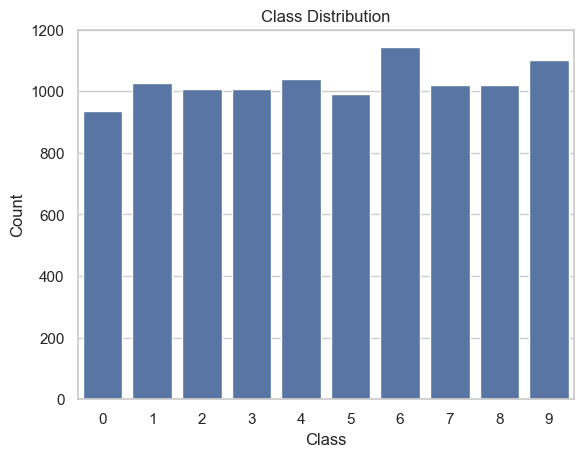

In [7]:
sns.set(style="whitegrid")  # Set the plot style

# Create a countplot
sns.countplot(data=df, x='y')

# Add labels and a title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')

# Show the plot
plt.show()



In [8]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y,10)


In [9]:
X[0]

array([[0.00784314, 0.00784314, 0.        , ..., 0.90196078, 0.58039216,
        0.63137255],
       [0.00392157, 0.00784314, 0.00392157, ..., 0.90588235, 0.66666667,
        0.55294118],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.89019608, 0.75686275,
        0.51372549],
       ...,
       [0.5254902 , 0.46666667, 0.51764706, ..., 0.07058824, 0.07058824,
        0.0745098 ],
       [0.5254902 , 0.43529412, 0.45882353, ..., 0.07843137, 0.03921569,
        0.00392157],
       [0.50588235, 0.44705882, 0.49019608, ..., 0.08235294, 0.02745098,
        0.03137255]])

In [10]:
y_train_encoded.shape

(10299, 10)

In [11]:
y_train_encoded[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
len(X)

10299

In [13]:
y_arr = np.array(y_train_encoded)
X_arr = np.array(X)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=4)

In [16]:
y_train.shape

(6591, 10)

In [17]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel([y[index]])

School zone(6)
(2060, 224, 224)


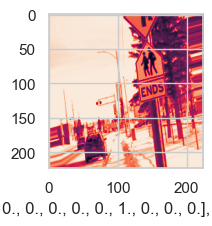

In [18]:
plot_sample(X_test, y_test,5)
position = np.argmax(y_test[5])
print(pred_class[position])
print(X_test.shape)

# Transfer learning

In [19]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, Concatenate
from keras import layers

from tensorflow.keras import layers
from tensorflow_hub import KerasLayer

In [20]:

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False



# Define the input shape for your grayscale image
input_shape = (224, 224, 1)

# Create an Input layer for your model with the specified input shape
model_input =  tf.keras.layers.Input(shape=input_shape)

# Concatenate the single-channel input three times to create a three-channel image
x = tf.keras.layers.Concatenate(axis=-1)([model_input, model_input, model_input])

# Pass the concatenated image through the MobileNetV2 model
output = base_model(x)


In [21]:
x = GlobalAveragePooling2D()(output)

# Dense layers for classification
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)



# Output layer with the number of units equal to the number of classes in your task
# Assuming binary classification for illustration purposes
num_classes = 10
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=model_input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 concatenate (Concatenate)   (None, 224, 224, 3)          0         ['input_2[0][0]',             
                                                                     'input_2[0][0]',             
                                                                     'input_2[0][0]']             
                                                                                                  
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)           2257984   ['concatenate[0][0]']         
 tional)                                                                                      

In [22]:


# Train the model on your custom data
epochs = 10  # Adjust as needed
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)





# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


Epoch 1/10

206/206 [==============================] - 77s 341ms/step - loss: 1.0564 - accuracy: 0.6506 - val_loss: 0.6610 - val_accuracy: 0.7816
Epoch 2/10
206/206 [==============================] - 67s 327ms/step - loss: 0.5204 - accuracy: 0.8313 - val_loss: 0.5329 - val_accuracy: 0.8265
Epoch 3/10
206/206 [==============================] - 72s 348ms/step - loss: 0.3352 - accuracy: 0.8962 - val_loss: 0.4907 - val_accuracy: 0.8422
Epoch 4/10
206/206 [==============================] - 74s 358ms/step - loss: 0.2330 - accuracy: 0.9260 - val_loss: 0.4237 - val_accuracy: 0.8786
Epoch 5/10
206/206 [==============================] - 67s 328ms/step - loss: 0.1682 - accuracy: 0.9481 - val_loss: 0.4066 - val_accuracy: 0.8792
Epoch 6/10
206/206 [==============================] - 69s 337ms/step - loss: 0.1257 - accuracy: 0.9627 - val_loss: 0.4142 - val_accuracy: 0.8817
Epoch 7/10
206/206 [==============================] - 67s 327ms/step - loss: 0.1121 - accuracy: 0.9646 - val_loss: 0.3571 - val_a

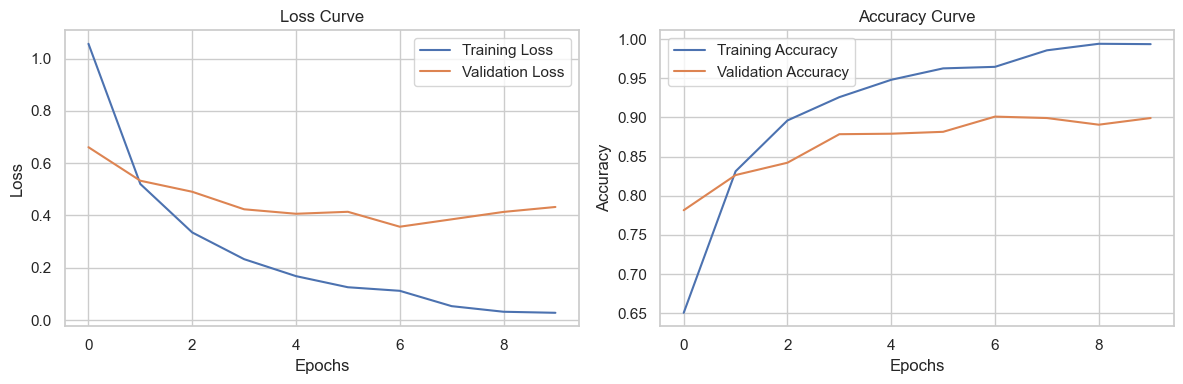

In [30]:
# Plot the loss curve
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score

# Assuming you have the model and X_test, y_test
y_pred_probs = model.predict(X_test)
y_pred_multiclass = np.argmax(y_pred_probs, axis=1)  # Get the predicted class labels

# Ensure y_test is a 1D array
y_test = np.argmax(y_test, axis=1)  # Assuming y_test is one-hot encoded

# Compute confusion matrix for multiclass classification
conf_matrix_multiclass = confusion_matrix(y_test, y_pred_multiclass)
print("\nConfusion Matrix (Multiclass Classification):")
print(conf_matrix_multiclass)

# Compute micro-average F1 score for multiclass classification
f1_micro = f1_score(y_test, y_pred_multiclass, average='micro')
print("Micro-average F1 Score (Multiclass Classification):", f1_micro)

# Compute macro-average F1 score for multiclass classification
f1_macro = f1_score(y_test, y_pred_multiclass, average='macro')
print("Macro-average F1 Score (Multiclass Classification):", f1_macro)


65/65 [==============================] - 20s 259ms/step

Confusion Matrix (Multiclass Classification):
[[145   1   3   4  12   2   6   2   4   1]
 [  3 186   7   3   1   1   2   2   3   0]
 [  2   2 190   2   3   3   0   1   2   0]
 [  2   8   3 173   3   2   0   4   2   0]
 [  6   3   1   2 176  11   2   2   3   3]
 [  1   1   1   0   0 192   0   1   0   0]
 [ 10   4   5   4  18   7 167   6   1   2]
 [  2   1   9   1   1   0   1 172   2   0]
 [  2   1   6   4   2   3   0   1 188   1]
 [  1   0   5   0   3   4   0   1   0 230]]
Micro-average F1 Score (Multiclass Classification): 0.8830097087378641
Macro-average F1 Score (Multiclass Classification): 0.8811366696949703


In [29]:
#model.save('D:\\Project\\TrafficSign\\Models\\aug_model.h5')

d:\Project\myenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
img = plt.imread('1.jpg')
img = cv2.resize(img, (224, 224))
img = np.array(img)
img = img / 255.0
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))

# Predict the class of the test image
predictions = model.predict(img)

1/1 [==============================] - 1s 875ms/step


In [26]:
predictions

array([[1.8792212e-08, 9.9958819e-01, 1.1816740e-06, 3.9391819e-04,
        3.5460243e-06, 5.6074292e-08, 6.5127504e-12, 9.8979799e-06,
        2.7101046e-06, 4.9691181e-07],
       [1.8792212e-08, 9.9958819e-01, 1.1816740e-06, 3.9391819e-04,
        3.5460243e-06, 5.6074292e-08, 6.5127504e-12, 9.8979799e-06,
        2.7101046e-06, 4.9691181e-07],
       [1.8792212e-08, 9.9958819e-01, 1.1816740e-06, 3.9391819e-04,
        3.5460243e-06, 5.6074292e-08, 6.5127504e-12, 9.8979799e-06,
        2.7101046e-06, 4.9691181e-07]], dtype=float32)

In [27]:
position = np.argmax(predictions)
print(pred_class[position])
print(position)

do not enter(1)
1


In [28]:
img = plt.imread('4c6.jpg')
plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '4c6.jpg'